# Multivariate Time Series Forecasting with LSTMs in Keras

In [41]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [37]:
fl_df = pd.read_csv('../exports/florida.csv')
fl_df['date'] = pd.to_datetime(fl_df['date']) # for some reason dtype isn't preserved
fl_df = fl_df.set_index('date')
fl_df

,death,deathIncrease,hospitalized,hospitalizedIncrease,positive,positiveIncrease,negative,negativeIncrease,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,
2020-03-21,12.0,2,158.0,158,528.0,142,6579.0,4709,-39.0,-3.0,-33.0,-42.0,-26.0,11.0
2020-03-22,13.0,1,185.0,27,731.0,203,7990.0,1411,-43.0,-12.0,-33.0,-49.0,-33.0,11.0
2020-03-23,14.0,1,217.0,32,1029.0,298,11063.0,3073,-37.0,-12.0,-33.0,-46.0,-36.0,15.0
2020-03-24,18.0,4,259.0,42,1205.0,176,13127.0,2064,-38.0,-12.0,-33.0,-46.0,-39.0,16.0
2020-03-25,22.0,4,316.0,57,1488.0,283,15374.0,2247,-38.0,-13.0,-33.0,-48.0,-40.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,21514.0,77,62296.0,178,1250275.0,7157,7280442.0,20227,-22.0,-18.0,-23.0,-24.0,-20.0,6.0
2020-12-28,21613.0,99,62507.0,211,1258315.0,8040,7300176.0,19734,-13.0,-10.0,-13.0,-30.0,-41.0,11.0
2020-12-29,21718.0,105,62999.0,492,1270063.0,11748,7332925.0,32749,-12.0,-7.0,-8.0,-27.0,-41.0,11.0


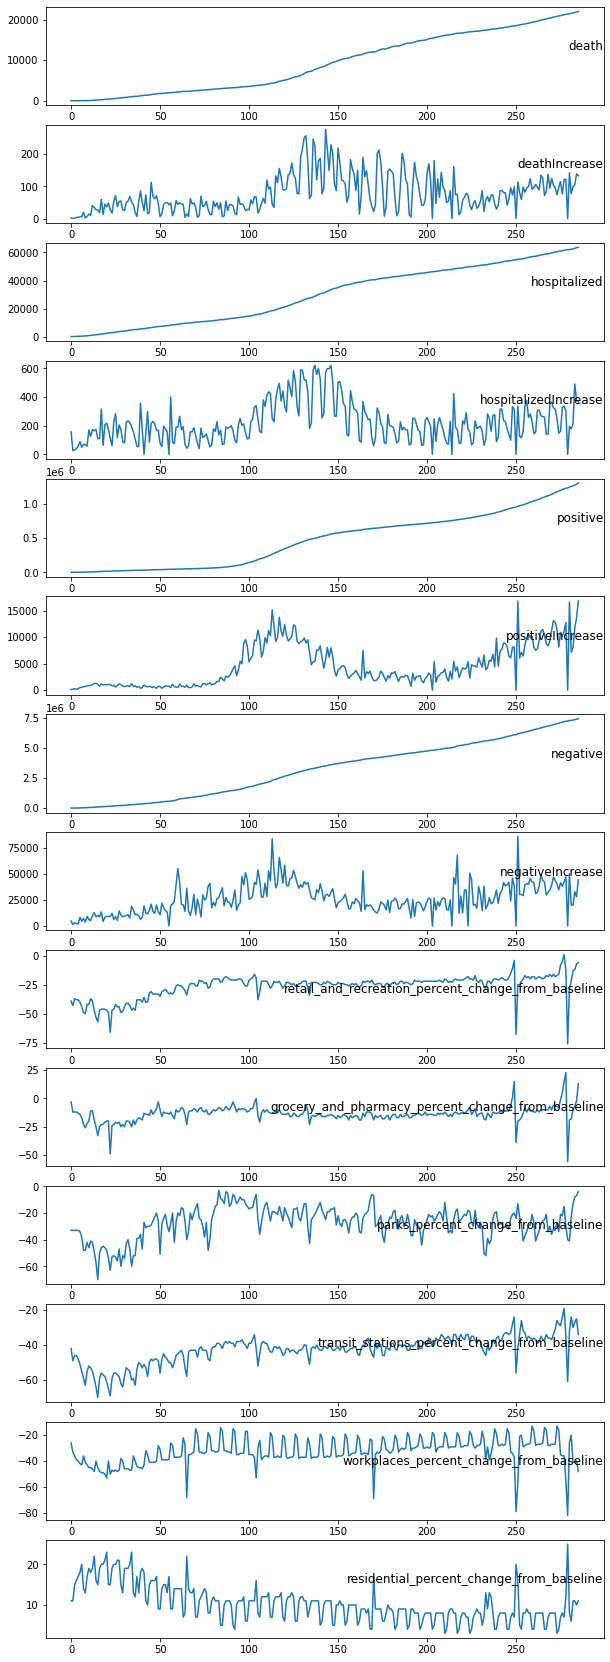

In [38]:
values = fl_df.values
# specify columns to plot
groups = list(range(14))
i = 1
# plot each column
plt.figure(figsize=(10,30))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(fl_df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()